# Simple CMIP6 file metadata and naming conventions example
- locate data in large data collection based on naming conventions
- show data file attributes
- access example data (e.g. for ploting)
- (inspired by https://metos-uio.github.io/GEO4962/04-Simple_plot/index.html )


In [1]:
import xarray as xr
import pandas as pd

## naming conventions
- use directory naming convention to navigate to directory
- use file naming convention to select a specific file

In [2]:
path = "/pool/data/CMIP6/data/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/v20190308/"
filename = path+"tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc"
print(filename)

/pool/data/CMIP6/data/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/v20190308/tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc


In [3]:
ds = xr.open_dataset(filename)

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [4]:
ds

<xarray.Dataset>
Dimensions:    (time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float32 ...
    lon_bnds   (lon, nbnd) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T23:34:05Z
    ...                     ...
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

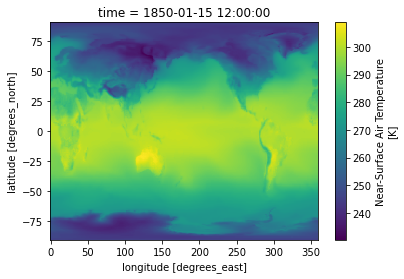

In [5]:
#To plot the first time step
ds.tas.isel(time=0).plot()

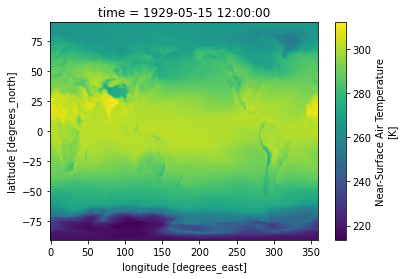

In [6]:
# To plot May 1929
ds.tas.sel(time='1929-05').plot()

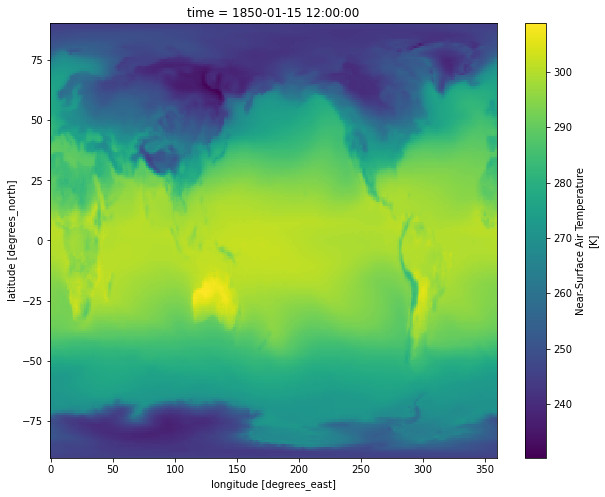

In [7]:
#import python package to scale image
import matplotlib as mpl

#adjust figure size
mpl.rcParams['figure.figsize'] = [10., 8.]
ds.tas.isel(time=0).plot()

/pool/data/CMIP6/data/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/ta/gn/v20190308/ta_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc


/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'ta' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


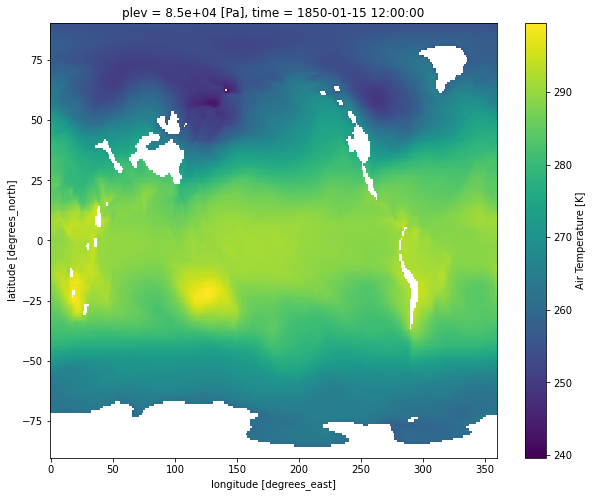

In [8]:
# Open data file and read data
path = "/pool/data/CMIP6/data/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/ta/gn/v20190308/"
filename = path+"ta_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc"
print(filename)
ds = xr.open_dataset(filename)

# Plot the first time step at the 850 hPa pressure level
ds.ta.isel(time=0, plev=2).plot()

/pool/data/CMIP6/data/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/ua/gn/v20190308/ua_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc


/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'ua' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


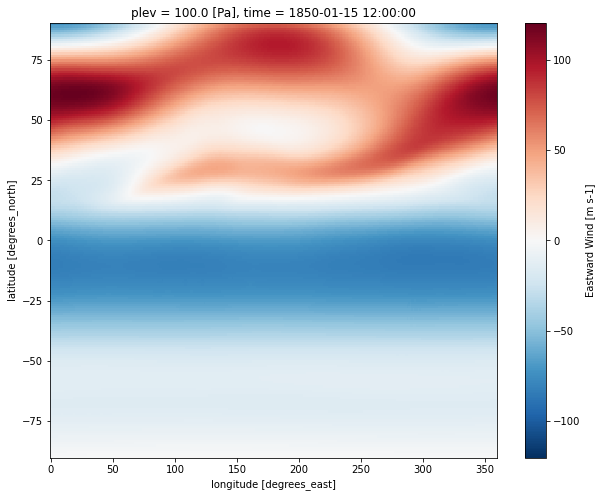

In [9]:
# Open data file and read data
path = "/pool/data/CMIP6/data/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/ua/gn/v20190308/"
filename = path + 'ua_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc'
print(filename)
ds = xr.open_dataset(filename)

# Plot the first time step at higgest pressure level
ds.ua.isel(plev=-1,time=0).plot()

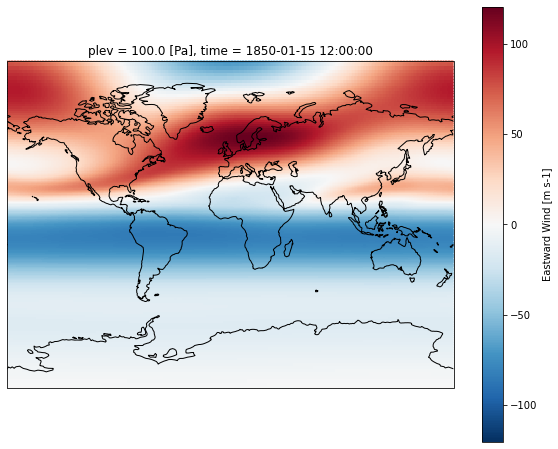

In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection=ccrs.Miller())

ds.ua.isel(plev=-1,time=0).plot(ax=ax, 
           transform=ccrs.PlateCarree()
          )

ax.coastlines()